In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf



from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
df = pd.read_csv('data.csv', names = column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [3]:
df.describe()

,serial,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2499.500000,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,1443.520003,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,0.000000,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,1249.750000,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2499.500000,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,3749.250000,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,4999.000000,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000


In [4]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [5]:
df = df.iloc[:, 1:]
df_norm = (df - df.mean())/df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [6]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value (y_pred):
    return int((y_pred*y_mean)/y_std)

In [7]:
x = df_norm.iloc[: , :5]
x.head()

,date,age,distance,stores,latitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301
2,1.298598,-0.083410,-0.618094,0.663402,1.590328
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238
4,0.932135,0.534444,0.006938,0.981581,-1.255981


In [8]:
y = df_norm.iloc[: ,-1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [9]:
x_arr = x.values
y_arr = y.values

print('features array :',x_arr)
print('label array : ',y_arr)

features array : [[ 0.01597778  0.18138426  1.25700164  0.34522379 -0.30721158]
 [-0.35048517 -1.31911814 -0.93060999 -0.60931203  0.32530146]
 [ 1.29859812 -0.08341028 -0.61809404  0.66340239  1.59032754]
 ...
 [ 1.4818296  -1.14258845  1.56951759  0.02704518  1.59032754]
 [ 0.19920926  1.59362182 -0.61809404  0.02704518 -1.25598114]
 [ 1.66506107 -0.87779391 -1.24312594  1.2997596   1.59032754]]
label array :  [ 0.35008836 -1.83648583 -0.33958379 ...  0.19138539  0.39809111
 -1.11350566]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_arr,y_arr, test_size=0.05, random_state=0)

print('train shape', x_train.shape, y_train.shape)
print('test shape', x_test.shape, y_test.shape)

train shape (4750, 5) (4750,)
test shape (250, 5) (250,)


In [11]:
def get_model ():
    model = Sequential([
        Dense(10, input_shape=(5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])
    
    model.compile(
        loss = 'mse',
        optimizer = 'adam'
    )
    
    return model


get_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [12]:
es_cb = EarlyStopping(monitor='val_loss', patience=5)

model = get_model()

preds_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 50,
    callbacks = [es_cb]
    
)

8/8 [==============================] - 1s 837us/step
Epoch 1/50
149/149 [==============================] - 1s 3ms/step - loss: 0.7929 - val_loss: 0.4529
Epoch 2/50
149/149 [==============================] - 0s 2ms/step - loss: 0.4385 - val_loss: 0.2356
Epoch 3/50
149/149 [==============================] - 0s 2ms/step - loss: 0.2469 - val_loss: 0.1709
Epoch 4/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1891 - val_loss: 0.1575
Epoch 5/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1728 - val_loss: 0.1548
Epoch 6/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1667 - val_loss: 0.1582
Epoch 7/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1635 - val_loss: 0.1528
Epoch 8/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1621 - val_loss: 0.1564
Epoch 9/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.1554
Epoch 10/50
149/149 [==========================

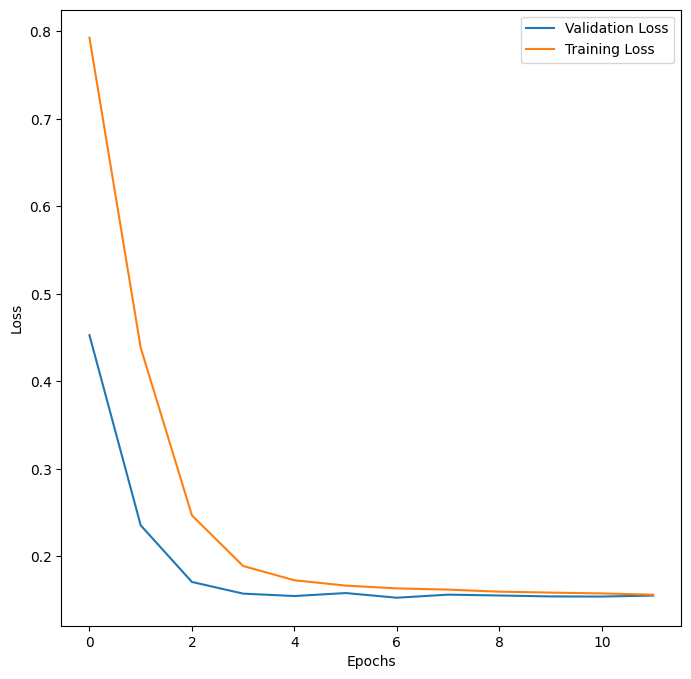

In [13]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)

C:\Users\Shrii\AppData\Local\Temp\ipykernel_11876\3213956057.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int((y_pred*y_mean)/y_std)


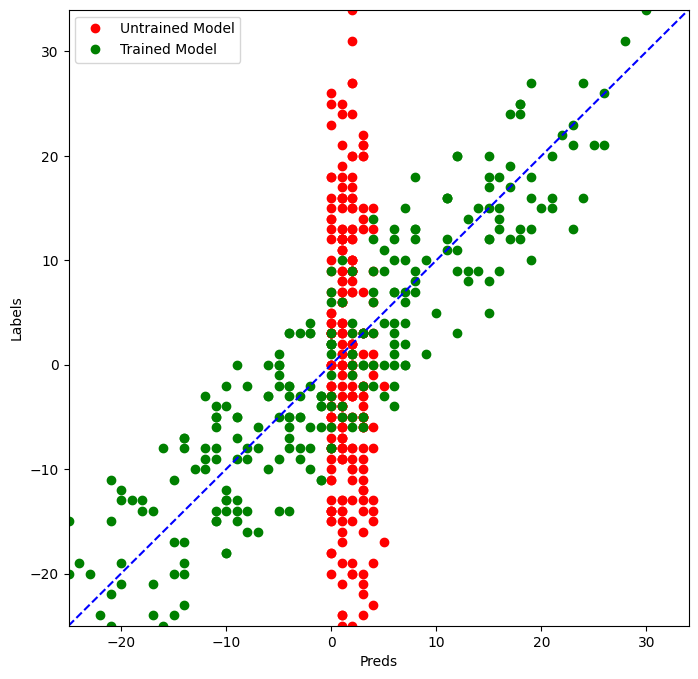

In [15]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]
prince_test = [convert_label_value(y) for y in y_test]

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

compare_predictions(price_untrained, price_trained, prince_test)